In [197]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
import joblib
import tensorflow as tf

In [198]:
df = pd.read_csv('C:/Users/FRANK/Desktop/Proyectos Linkedin/Python Proyectos/Redes Neuronales/Dia 26/diabetes.csv')
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [199]:
df2 = df.copy()
print('Número de observaciones (filas) = {}'.format(df2.shape[0]))
print('Total de variables disponibles (columnas) = {} '.format(df2.columns.shape[0]))
print('Columnas que cuentan con un valor nulo -')
print(df2.isnull().sum())

Número de observaciones (filas) = 768
Total de variables disponibles (columnas) = 9 
Columnas que cuentan con un valor nulo -
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [200]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Text(0.5, 1.0, 'Outcome')

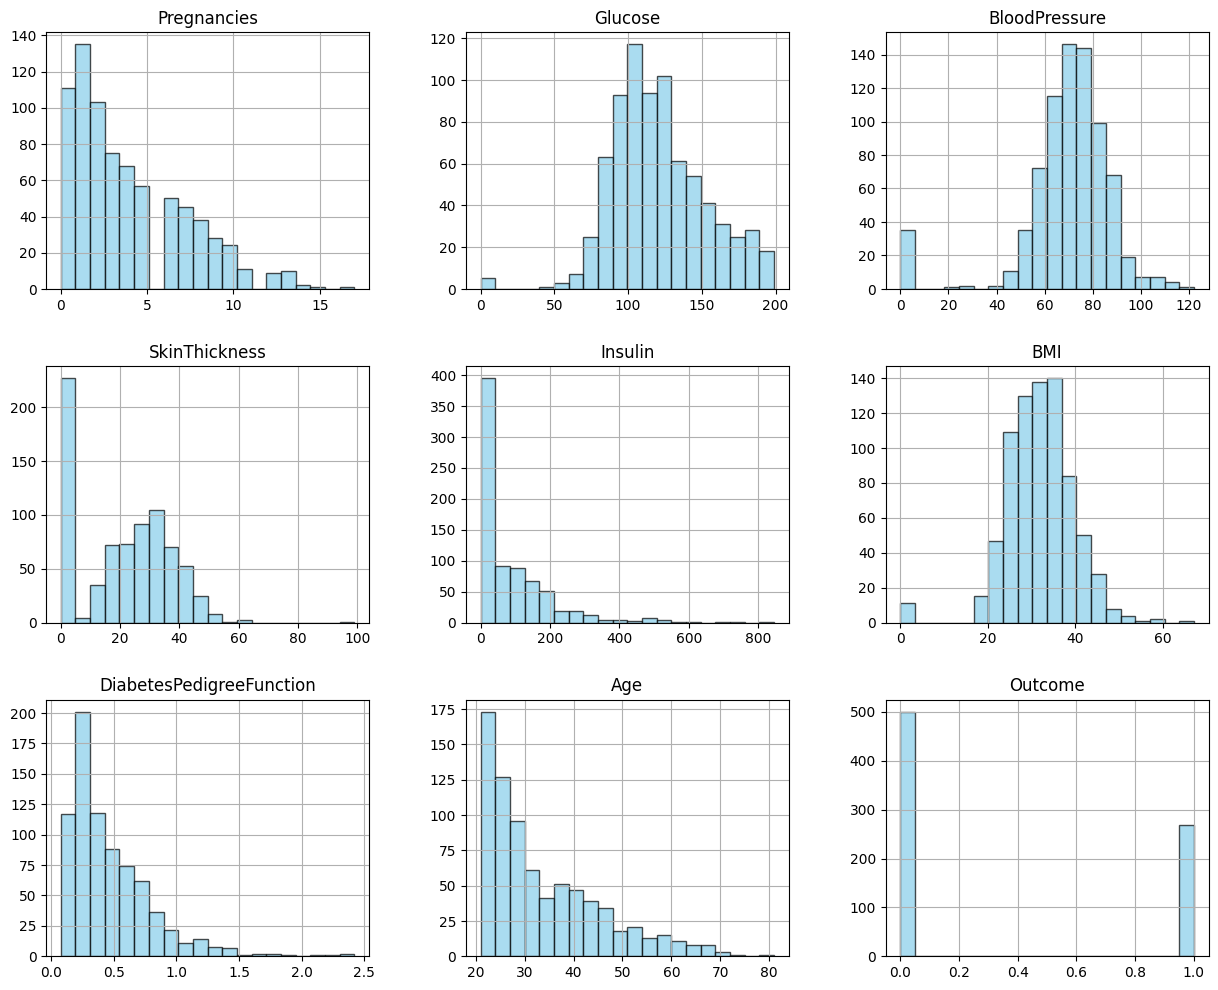

In [201]:
# Crear histogramas mejorados
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
df2.hist(ax=axes, bins=20, color='skyblue', edgecolor='black', alpha=0.7)

# Añadir títulos a cada subgráfico
axes[0, 0].set_title('Pregnancies')
axes[0, 1].set_title('Glucose')
axes[0, 2].set_title('BloodPressure')
axes[1, 0].set_title('SkinThickness')
axes[1, 1].set_title('Insulin')
axes[1, 2].set_title('BMI')
axes[2, 0].set_title('DiabetesPedigreeFunction')
axes[2, 1].set_title('Age')
axes[2, 2].set_title('Outcome')

In [202]:
# Definir características numéricas y categóricas

numeric_features = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']

In [203]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df2[numeric_features] = scaler.fit_transform(df2[numeric_features]) # type: ignore

Text(0.5, 1.0, 'Outcome')

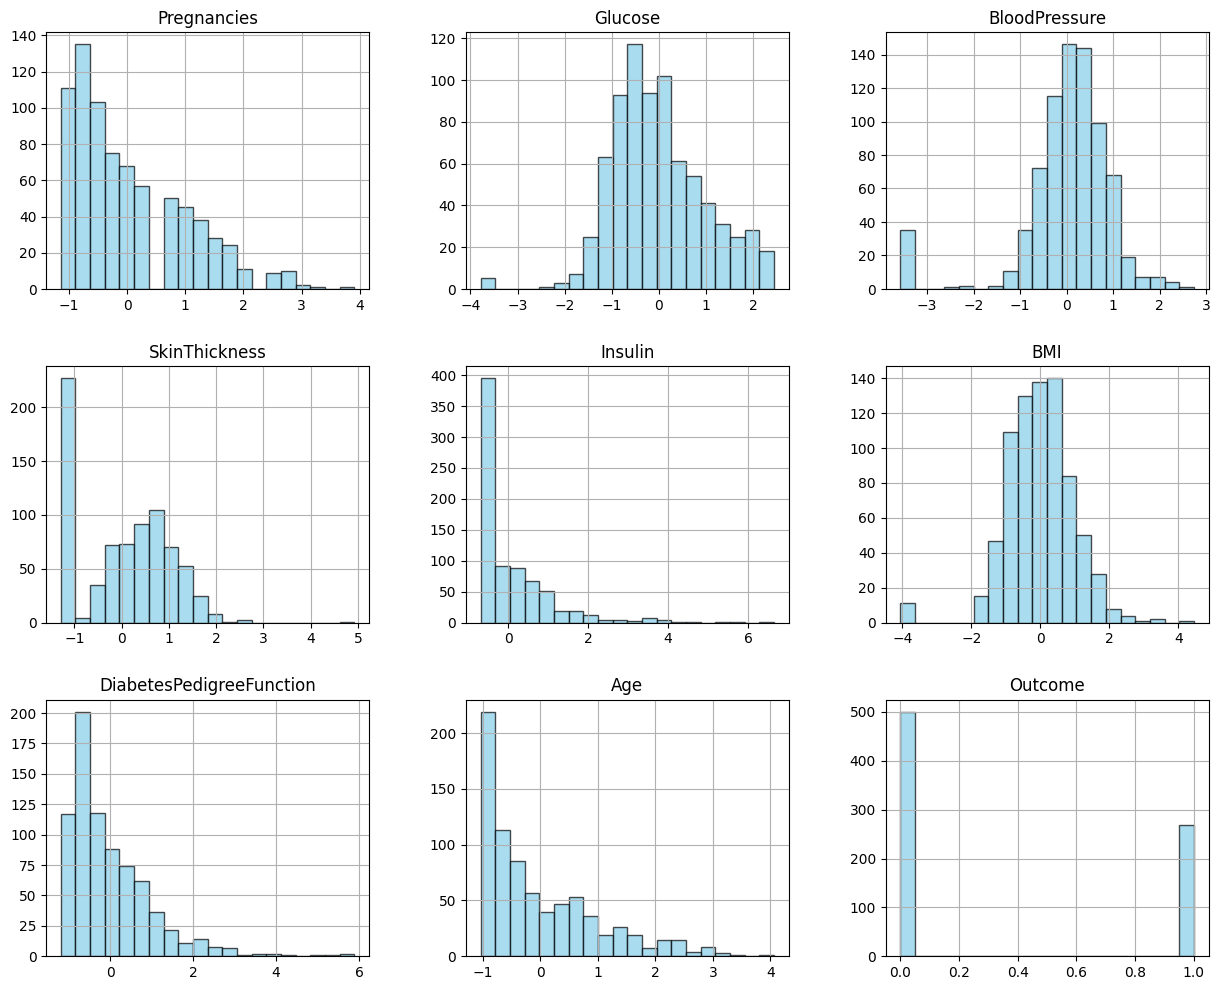

In [204]:
# Crear histogramas mejorados
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
df2.hist(ax=axes, bins=20, color='skyblue', edgecolor='black', alpha=0.7)

# Añadir títulos a cada subgráfico
axes[0, 0].set_title('Pregnancies')
axes[0, 1].set_title('Glucose')
axes[0, 2].set_title('BloodPressure')
axes[1, 0].set_title('SkinThickness')
axes[1, 1].set_title('Insulin')
axes[1, 2].set_title('BMI')
axes[2, 0].set_title('DiabetesPedigreeFunction')
axes[2, 1].set_title('Age')
axes[2, 2].set_title('Outcome')

In [205]:
df2.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995,1
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672,0
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584,1
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549,0
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496,1


# Redes Neuronales

In [206]:
# Definir X e y
X = df2.drop(columns=['Outcome'])
y = df2['Outcome']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [207]:
oculta  = tf.keras.layers.Dense(units=32,activation='relu',input_shape=[8])
dropout = tf.keras.layers.Dropout(0.3)
oculta1 = tf.keras.layers.Dense(units=16,activation='relu')
dropout1 = tf.keras.layers.Dropout(0.3)
salida  = tf.keras.layers.Dense(units=1,activation='sigmoid')
modelo = tf.keras.Sequential([oculta,dropout,oculta1,dropout1,salida])

In [208]:
modelo.compile(optimizer=tf.keras.optimizers.Adam(0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [209]:
# Implementar el early_stopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=10,restore_best_weights=True)

In [210]:
# Entrenar el modelo
print('Comenzando entrenamiento')
historial = modelo.fit(X_train,y_train,epochs=1000,batch_size=16,verbose=False,validation_split=0.2,callbacks=[early_stopping])
print('Modelo entrenado')

Comenzando entrenamiento
Modelo entrenado


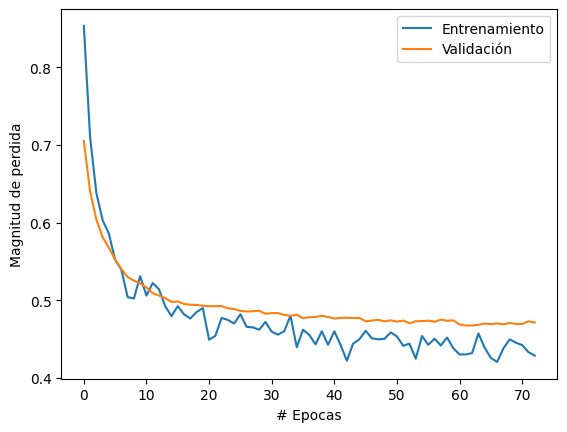

In [211]:
plt.xlabel('# Epocas')
plt.ylabel('Magnitud de perdida')
plt.plot(historial.history['loss'])
plt.plot(historial.history['val_loss'])
plt.legend(['Entrenamiento','Validación'])
plt.show()

In [212]:
# Realizar la predicción
print('Vamos a hacer una predicción')
nuevo_dato = np.array([[1, 3, 10, 70, 10, 10,10,50 ]])  # Ejemplo de nuevo dato con las 7 características numéricas
nuevo_dato[:, :8] = scaler.transform(nuevo_dato[:, :8])  # Escalar las características numéricas
resultado = modelo.predict(nuevo_dato)

print(f'El resultado es: {resultado[0][0]}')

Vamos a hacer una predicción
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
El resultado es: 0.3165332078933716


In [213]:
# Convertir la probabilidad a una predicción binaria
prediccion_binaria = (resultado > 0.5).astype(int)

# Imprimir el resultado y la predicción
print(f'El resultado es: {prediccion_binaria[0][0]}')
if prediccion_binaria[0][0] == 0:
    print(f'El resultado es: {prediccion_binaria[0][0]}, predicción: 0, No diabetes')
else:
    print(f'El resultado es: {prediccion_binaria[0][0]}, predicción: 1, Diabetes')

El resultado es: 0
El resultado es: 0, predicción: 0, No diabetes


In [214]:
# Realizar predicciones usando el modelo entrenado
predicciones = modelo.predict(X)

predicciones_binarias = (predicciones > 0.5).astype(int).flatten()

df2['Outcome_pred'] = predicciones_binarias

# Verificar las primeras filas del DataFrame con las predicciones
print(df2.head())

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 739us/step
   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.639947  0.848324       0.149641       0.907270 -0.692891  0.204013   
1    -0.844885 -1.123396      -0.160546       0.530902 -0.692891 -0.684422   
2     1.233880  1.943724      -0.263941      -1.288212 -0.692891 -1.103255   
3    -0.844885 -0.998208      -0.160546       0.154533  0.123302 -0.494043   
4    -1.141852  0.504055      -1.504687       0.907270  0.765836  1.409746   

   DiabetesPedigreeFunction       Age  Outcome  Outcome_pred  
0                  0.468492  1.425995        1             1  
1                 -0.365061 -0.190672        0             0  
2                  0.604397 -0.105584        1             1  
3                 -0.920763 -1.041549        0             0  
4                  5.484909 -0.020496        1             1  


In [215]:
# Comparar las predicciones con los valores reales
correct_prediction = (df2['Outcome'] == df2['Outcome_pred']).sum()


In [216]:
total_predicciones = len(df2)
precisión = (correct_prediction / total_predicciones) * 100
print(f'Precisión: {precisión:.2f}%')

margen_de_error = 100 - precisión
print(f'Margen de error: {margen_de_error:.2f}%')

Precisión: 79.04%
Margen de error: 20.96%


In [217]:
df2['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [218]:
df2['Outcome_pred'].value_counts()

Outcome_pred
0    531
1    237
Name: count, dtype: int64